Magnitude 2.7: 7 km SSE of Bluff City, Kansas
Magnitude 3.5: 24 km SW of Coyanosa, Texas
Magnitude 3.6: 1 km SSE of Standard, Illinois
Magnitude 4.4: 98 km NW of Hihifo, Tonga
Magnitude 4.1: Cook Strait, New Zealand
Magnitude 4.1: North Island of New Zealand
Magnitude 4.8: 89 km WNW of Bengkulu, Indonesia
Magnitude 2.8: 15 km SW of Petersville, Alaska
Magnitude 4.4: 62 km W of San José de Jáchal, Argentina
Magnitude 2.56: 7 km WSW of Langston, Oklahoma
Magnitude 5: Banda Sea
Magnitude 2.71: 12 km SE of Pinnacles, CA
Magnitude 2.5: 1 km S of Honaunau-Napoopoo, Hawaii
Magnitude 3.29: 95 km NNE of Suárez, Puerto Rico
Magnitude 4.1: 7 km NNE of Matsuzaki, Japan
Magnitude 2.45: Puerto Rico region
Magnitude 3.77: 115 km N of San Juan, Puerto Rico
Magnitude 4.9: 31 km SW of Ashkāsham, Afghanistan
Magnitude 2.51: 6 km SW of Guánica, Puerto Rico
Magnitude 4.3: 70 km NW of Malfa, Italy
Magnitude 4.2: 57 km E of Khorugh, Tajikistan
Magnitude 2.54: 6 km NNW of Marland, Oklahoma
Magnitude 4.3: nort

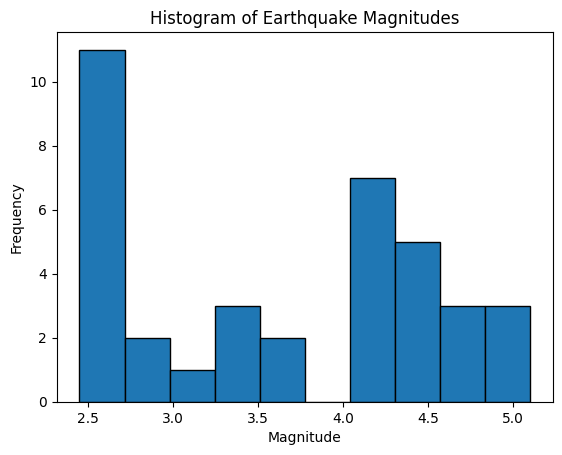

File saved successfully.


In [2]:
import urllib.request
import json
import csv
import matplotlib.pyplot as plt

USGS_URL = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_day.geojson"

def fetch_data(url):
    try:
        web_response = urllib.request.urlopen(url)
        if web_response.getcode() == 200:
            return web_response.read()
        else:
            print(f"Error: {web_response.getcode()}")
            return None
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

def parse_json(data):
    try:
        return json.loads(data)
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return None

def print_earthquake_info(features):
    for feature in features:
        place = feature["properties"]["place"]
        magnitude = feature["properties"]["mag"]
        print(f"Magnitude {magnitude}: {place}")

def write_to_csv(features, filename="respuestaSismos.csv"):
    with open(filename, 'w', encoding="utf-8", newline='') as csvfile:
        fieldnames = ['place', 'mag']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for feature in features:
            writer.writerow({'place': feature['properties']['place'], 'mag': feature['properties']['mag']})

def main():
    data = fetch_data(USGS_URL)
    if data:
        json_data = parse_json(data)
        if json_data:
            print_earthquake_info(json_data["features"])
            write_to_csv(json_data["features"])
            print("File saved successfully.")

if __name__ == "__main__":
    main()



def generate_magnitude_histogram(features):
    magnitudes = [feature['properties']['mag'] for feature in features]
    plt.hist(magnitudes, bins=10, edgecolor='black')
    plt.title('Histogram of Earthquake Magnitudes')
    plt.xlabel('Magnitude')
    plt.ylabel('Frequency')
    plt.show()

def main():
    data = fetch_data(USGS_URL)
    if data:
        json_data = parse_json(data)
        if json_data:
            print_earthquake_info(json_data["features"])
            write_to_csv(json_data["features"])
            generate_magnitude_histogram(json_data["features"])
            print("File saved successfully.")

if __name__ == "__main__":
    main()